<br>
<font color=blue  size=6 face="微軟正黑體">期末專案報告</font> 
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">組員 : 紀弘俊(David Chi)    胡嘉展(Joser Hu) </font>  
<br>
<font color="#000080"  size=4 face="微軟正黑體">主題 : 應用深度學習來識別蔬果</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 介紹 :</font>  
<br>
<font color="#000080" size=3 face="微軟正黑體"> 
使用卷積神經網路CNN識別蔬果圖像，內容包括 : 蘋果、梨、香蕉、仙人掌果、哈密瓜、櫻桃、萊姆、番茄、葡萄、葡萄柚、番石榴、榛子、桃、柿子、大頭菜、檸檬、荔枝、柑、芒果、甜瓜、桑樹、橙、木瓜、百香果、桃、鳳梨、辣椒、菠蘿、石榴、柚子蜜、木瓜、紅毛丹、覆盆子、紅醋栗、草莓.....
</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 實作方法 : </font>
<br>
<font color="#000080"  size=3 face="微軟正黑體"> 使用卷積神經網路CNN(Convolutional neural network)訓練流程</font>  
<img src="CNN_1.png" alt="drawing" style="width: 800px;"/>

<br>
<font color=Red size=3 face="微軟正黑體">[輸入]</font>
<br>
* 圖像大小：100x100 Pixel
* 訓練圖像數量: 53,177 張圖 
* 測試圖像數量: 17,845 張圖

<br>
<font color=Red size=3 face="微軟正黑體"> [輸出]</font>
<br>
* 可分辨蔬果分類數量：103 種水果
* 識別圖像來源 : 經由水果測試圖像進行預測識別出水果種類。

<br>
<font color=Red size=3 face="微軟正黑體">[訓練資料結構]</font>
<br>
1. 建立103種 "英文水果名稱" 目錄，按照英文字母由a~z排列出順序，大約 (0~100) 個目錄。
2. 標註Label (y_train)   : 水果目錄順序碼
3. 特徵Feature (x_train) : 水果目錄下圖像檔

<font color="#000080"  size=5 face="微軟正黑體"> 專案排程與步驟 :</font>  
<img src="CNN_3.png" alt="drawing" style="width: 800px;"/>

<font color=blue  size=5 face="微軟正黑體" > 1. 資料收集 </font> 
<font color="#000080" size=3 face="微軟正黑體"  > 開始構建CNN，對fruits數據集進行多類分類，共有 71,022 筆圖像，分為兩個文件夾 :  </font>
1. 訓練集 : 53,177 筆圖像
2. 測試集 : 17,845 筆圖像

<font color=blue  size=5 face="微軟正黑體" > 2. 資料預處理(Preprocess) </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 2.1 將圖片資料依水果分類(特徵Feature)及建立分類水果真實名稱為目錄(標註Label) </font> 

In [1]:
# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import numpy as np

train_dir = './fruits-360/Training'
test_dir = './fruits-360/Test'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

# Training fruit image :x_train 
# Training label id :y_train
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

print('Training set qty : ' , x_train.shape[0])  
print('Testing set qty : ', x_test.shape[0])      

Training set qty :  53177
Testing set qty :  17845


In [2]:
# 檢視圖像檔案及標籤 
x_train, y_train

(array(['./fruits-360/Training\\Pear Red\\r_260_100.jpg',
        './fruits-360/Training\\Raspberry\\r_171_100.jpg',
        './fruits-360/Training\\Mangostan\\r_132_100.jpg', ...,
        './fruits-360/Training\\Plum 3\\r3_42_100.jpg',
        './fruits-360/Training\\Pomelo Sweetie\\r2_130_100.jpg',
        './fruits-360/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U55'), array([70, 88, 55, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
no_of_classes = len(np.unique(y_train))
no_of_classes

103

In [4]:
# 更改為103個單位向量
print(y_train[0:10])

[70 88 55 97 13 15 80 64 20 81]


In [5]:
from keras.models import model_from_json
from keras.utils import np_utils
# CNN 輸出層的每筆 Data 都是一維陣列
# 所以, 需將 Train & Test Label 資料轉換為 One-Hot Encoding 
y_train = np_utils.to_categorical(y_train,no_of_classes) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0] 


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

<font color="#000080"  size=3 face="微軟正黑體" > 2.2 將資料集劃分為測試和驗證集 </font> 

In [6]:
# 將全測試集圖像資料，劃分測試集和驗證集，前7000個為測試集，7000以後為數據集
x_test,x_valid = x_test[7000:],x_test[:7000] # 7000筆以後為驗證集圖像，前7000筆為測試圖像
y_test,y_valid = y_test[7000:],y_test[:7000] # 7000筆以後為驗證集標籤，前7000筆為測試標籤
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 103)
Test X :  (10845,)
Test y :  (10845, 103)


<font color="#000080"  size=3 face="微軟正黑體" > 2.3 將像素轉換為數據矩陣</font> 

In [7]:
# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training data shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation data shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test data shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)
print('1st training image as array',x_train[0]) 

Training data shape :  (53177, 100, 100, 3)
Validation data shape :  (7000, 100, 100, 3)
Test data shape :  (10845, 100, 100, 3)
1st training image shape  (100, 100, 3)
1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 255. 251.]
  [255. 255. 255.]
  [255. 251. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 255. 253.]
  [255. 255. 255.]
  [255. 252. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [251. 255. 255.]
  [253. 254. 255.]
  [255. 254. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [8]:
# 將資料線性單位化至  [0,1] 
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

In [9]:
# 可視化前15個訓練圖像！
import matplotlib.pyplot as plt  

fig = plt.figure(figsize =(40,10))
for i in range(10):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[]) 
    ax.imshow(np.squeeze(x_train[i]))  
    

<font color=blue  size=5 face="微軟正黑體" > 3. 建立模型 </font> 
* 建立CNN 模型，輸入水果圖像，透過卷積層、池化層、提取圖像特徵，再以完全連結神經網路，包括平坦層、隱藏層、輸出層，組成神經網路
* 研讀並選擇合適的Loss functions

<font color="#000080"  size=3 face="微軟正黑體" > 3.1 訓練模型(二) </font> 

In [13]:
# 建立CNN神經網路 - 使用3個Conv層，然後是maxpooling層
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop,Adam
from keras import backend as K

# 建立空的神經網路學習機
model = Sequential()

# 逐層建立神經網路，模型加入【輸入層】與【第一層卷積層】
# 產生 16 個類似濾鏡效果的卷積圖片,輸入層為 (100, 100, 3) 的三維陣列,卷積圖片大小與原始圖片一樣,也就是 100x100
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))# 定義conv2d 函數，進行卷積運算  
model.add(Activation('relu'))                                                          # 使用 relu 激活函數
model.add(MaxPooling2D(pool_size=(2,2)))                                               # 模型加入【第一層池化層】
# model.add(Dropout(0.25))                                                             # 以 2x2 進行縮減取樣
                                                                                       # 卷積圖片若為 100x100, 則縮減取樣後的圖片為 50x50
model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25)) 

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25)) 

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))                                                               # 加入Dropout避免overfitting，保留70%神經元
model.add(Flatten())                                                                  # 模型加入【平坦層】
model.add(Dense(150))                                                                 # 隱藏層有 150 個神經元 (值越大, 訓練越精準, 相對訓練時間也越久)
model.add(Activation('relu'))                                                         # 使用 relu 激活函數
model.add(Dropout(0.4))                                                               # 加入Dropout避免overfitting，保留60%神經元
model.add(Dense(103,activation = 'softmax'))                                          # 模型加入【輸出層】 有 101 個神經元
                                                                                      # 使用 softmax 激活函數 (softmax 值越高, 代表機率越大)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_3 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
__________

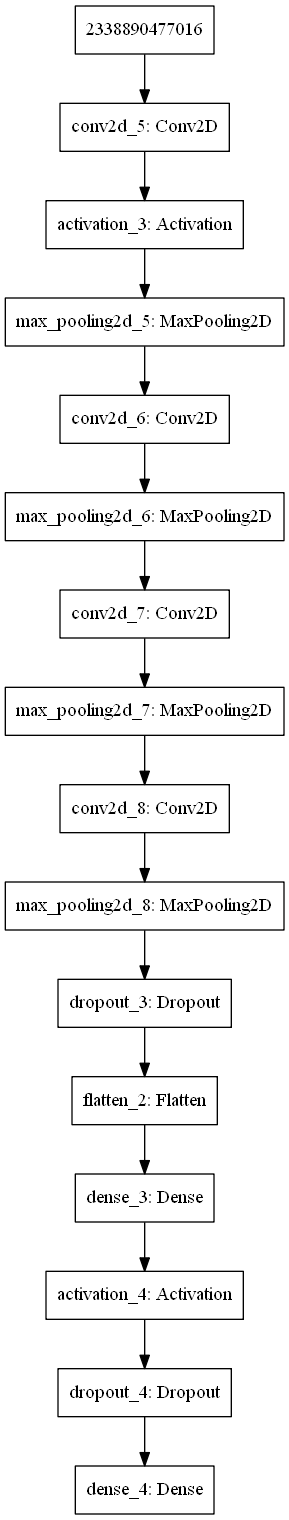

In [21]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='[NCTS]_Final_Report_CNN_Fruits360_JoserHu_&_DavidChi.png')
from IPython.display import Image
Image(filename="[NCTS]_Final_Report_CNN_Fruits360_JoserHu_&_DavidChi.png")

<font color="#000080"  size=3 face="微軟正黑體" > 設定模型的訓練方式 : </font> 
<br>
* 設定 Loss 損失函數為 categorical_crossentropy
* 設定 Optimizer 最佳化方法為 adam or rmsprop    
* 設定 Model 評估準確率方法為 accuracy

In [14]:
# 設定模型的訓練方式 (二)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 

<font color=blue  size=5 face="微軟正黑體" > 4. 訓練模型 </font> 

In [15]:
# 定義訓練參數，訓練的歷史記錄
 
filepath="./fruits-360/fruits_weights_best1.hdf5" # fruits_weights_best.hdf5
checkpointer = ModelCheckpoint(filepath, verbose = 1, save_best_only = True) 

history = model.fit(x_train,y_train,            
        batch_size = 128,                         
        epochs=10,                               
        validation_data=(x_valid, y_valid),     
        # validation_split = 0.2,                                                                  
        callbacks = [checkpointer],             
        verbose=2, shuffle=True)               

Train on 53177 samples, validate on 7000 samples
Epoch 1/10
 - 414s - loss: 1.5515 - acc: 0.5831 - val_loss: 0.2671 - val_acc: 0.9247

Epoch 00001: val_loss improved from inf to 0.26710, saving model to ./fruits-360/fruits_weights_best1.hdf5
Epoch 2/10
 - 400s - loss: 0.2208 - acc: 0.9262 - val_loss: 0.1317 - val_acc: 0.9617

Epoch 00002: val_loss improved from 0.26710 to 0.13173, saving model to ./fruits-360/fruits_weights_best1.hdf5
Epoch 3/10
 - 407s - loss: 0.0995 - acc: 0.9672 - val_loss: 0.0965 - val_acc: 0.9704

Epoch 00003: val_loss improved from 0.13173 to 0.09653, saving model to ./fruits-360/fruits_weights_best1.hdf5
Epoch 4/10
 - 406s - loss: 0.0666 - acc: 0.9784 - val_loss: 0.0442 - val_acc: 0.9836

Epoch 00004: val_loss improved from 0.09653 to 0.04420, saving model to ./fruits-360/fruits_weights_best1.hdf5
Epoch 5/10
 - 410s - loss: 0.0497 - acc: 0.9841 - val_loss: 0.0499 - val_acc: 0.9849

Epoch 00005: val_loss did not improve from 0.04420
Epoch 6/10
 - 405s - loss: 0.0

In [16]:
# 載入產生最佳驗證精度的權重
model.load_weights('./fruits-360/fruits_weights_best1.hdf5')

<font color=blue  size=5 face="微軟正黑體" > 5. 評估模型準確率 </font> 

In [17]:
# 估計準確度 損失和準確率
score = model.evaluate(x_test, y_test, verbose=0)
# 輸出結果
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033318589849542404
Test accuracy: 0.9896726602120793


<font color=blue  size=5 face="微軟正黑體" > 6. 進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth) </font> 

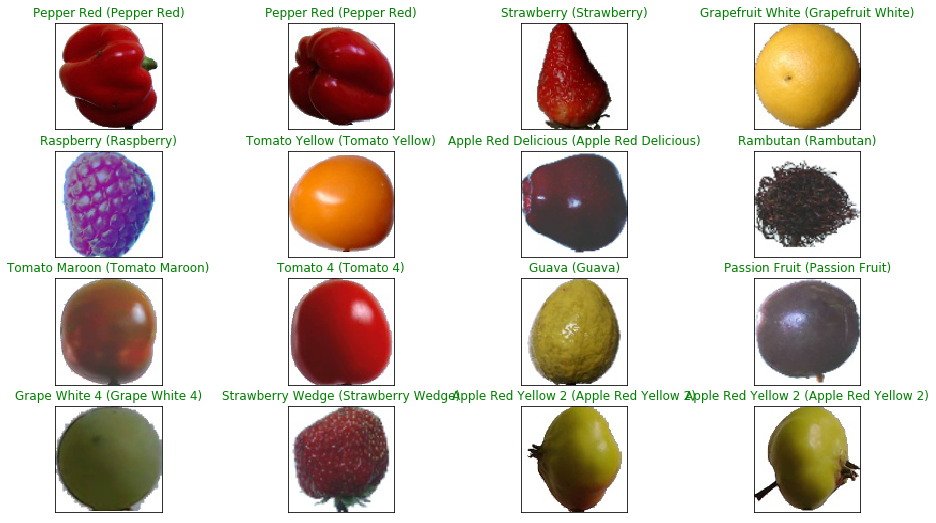

In [18]:
# 可視化測試預測結果
y_pred = model.predict(x_test)
# 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

<font color=blue  size=5 face="微軟正黑體" > 7. 結果報告 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 檢視損失和準確性結果 </font> 

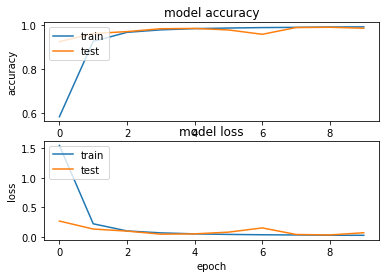

In [19]:
# 檢視損失率和精準度
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # 準確度結果  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # 損失率結果   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()